In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import pickle

In [2]:
allData_df = pd.read_csv("credit card defaulter/data_set_credit_card.csv")

In [3]:
allData_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
3,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
4,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1


In [4]:
allData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 25 columns):
ID                            13272 non-null int64
LIMIT_BAL                     13272 non-null int64
SEX                           13272 non-null int64
EDUCATION                     13272 non-null int64
MARRIAGE                      13272 non-null int64
AGE                           13272 non-null int64
PAY_0                         13272 non-null int64
PAY_2                         13272 non-null int64
PAY_3                         13272 non-null int64
PAY_4                         13272 non-null int64
PAY_5                         13272 non-null int64
PAY_6                         13272 non-null int64
BILL_AMT1                     13272 non-null int64
BILL_AMT2                     13272 non-null int64
BILL_AMT3                     13272 non-null int64
BILL_AMT4                     13272 non-null int64
BILL_AMT5                     13272 non-null int64
BILL_AMT6               

In [5]:
print(allData_df.columns)
print(len(allData_df.columns))

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
25


In [6]:
data_df = allData_df.copy()
print("Removing Un-necessory columns")
data_df = data_df.drop("ID" , axis=1)
data_df.head()
# data_df = data_df.drop("country_abrv" , axis=1)
# data_df = data_df.drop("rank_date" , axis=1)

Removing Un-necessory columns


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
3,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
4,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1


In [7]:
print(data_df.columns)
print(len(data_df.columns))

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
24


In [8]:
data_df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [9]:
data_df.groupby('default payment next month').size()

default payment next month
0    6636
1    6636
dtype: int64

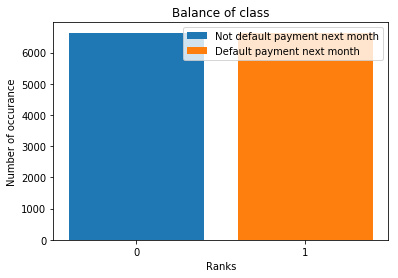

In [25]:
plt.bar(['0'],
        len(data_df[data_df['default payment next month']==0]),
        label="Not default payment next month")
plt.bar(['1'],
        len(data_df[data_df['default payment next month']==1]),
        label="Default payment next month")

plt.xlabel('Ranks')
plt.ylabel('Number of occurance')

plt.title("Balance of class")
plt.legend()
plt.show()

# Splitting

In [26]:
data_df.shape

(13272, 24)

In [29]:
X_train, X_test,y_train, y_test = train_test_split(
data_df.drop('default payment next month', axis=1),
    data_df['default payment next month'],test_size=0.3, random_state=0)

In [30]:
X_train.shape

(9290, 23)

In [32]:
X_test.shape

(3982, 23)

In [12]:
def evaluation(model_name,y_original,y_prediction):

    print('Accuracy score :')
    AC = accuracy_score(y_original,y_prediction,normalize=True)
    print(AC)
    binary_PRF = precision_recall_fscore_support(y_original,y_prediction, average='binary')
    print( binary_PRF)
    macro_PRF = precision_recall_fscore_support(y_original,y_prediction, average='macro')
    print( macro_PRF)
    micro_PRF = precision_recall_fscore_support(y_original,y_prediction, average='micro')
    print(micro_PRF)
    weighted_PRF = precision_recall_fscore_support(y_original,y_prediction, average='weighted')
    print(weighted_PRF)
    
    
    return {'Model Name':model_name,
            "Accuracy":round(AC,2),
            "Precision":round(binary_PRF[0],2),
            "Recall":round(binary_PRF[1],2),
            "F1 Measure":round(binary_PRF[2],2)}

# Traing Model

In [73]:
listOfModelEvaluations = []

## Logistic Regression

In [33]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
logisticRegression.fit(X_train,y_train)
print('Model is trained')

Model is trained


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print("Score")
print(logisticRegression.score(X_train,y_train))

Score
0.610010764262648


In [36]:
logReg_Predictions = logisticRegression.predict(X_test)
logReg_Predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [74]:
evaluations = evaluation('Logistic Regression',y_test,logReg_Predictions)
print(evaluations)
listOfModelEvaluations.append(evaluations)

Accuracy score :
0.6029633350075339
(0.5713708046906592, 0.7306101344364012, 0.6412525527569775, None)
(0.6130545209669334, 0.6065160047182006, 0.5983884355013451, None)
(0.6029633350075339, 0.6029633350075339, 0.6029633350075339, None)
(0.6142478769828789, 0.6029633350075339, 0.5971612859867438, None)
{'Model Name': 'Logistic Regression', 'Accuracy': 0.6, 'Precision': 0.57, 'Recall': 0.73, 'F1 Measure': 0.64}


# LinearSVC

In [49]:
linearsvc = LinearSVC()
linearsvc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [50]:
linearsvc.fit(X_train,y_train)
print('Model is trained')

Model is trained


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
print("Score")
print(linearsvc.score(X_train,y_train))

Score
0.5311087190527449


In [53]:
linearsvc_Predictions = linearsvc.predict(X_test)
linearsvc_Predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
evaluations = evaluation('LinearSVC',y_test,linearsvc_Predictions)
print(evaluations)
listOfModelEvaluations.append(evaluations)

Accuracy score :
0.5178302360622803
(0.5018888289260658, 0.9617373319544984, 0.6595744680851063, None)
(0.6168864434485402, 0.5301850722272492, 0.4167063390339473, None)
(0.5178302360622803, 0.5178302360622803, 0.5178302360622803, None)
(0.6201786905744975, 0.5178302360622803, 0.4097533087195746, None)
{'Model Name': 'LinearSVC', 'Accuracy': 0.52, 'Precision': 0.5, 'Recall': 0.96, 'F1 Measure': 0.66}


# Random Forest Classifier

In [55]:
random_forest = RandomForestClassifier()
random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
random_forest.fit(X_train,y_train)
print('Model is trained')

Model is trained


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
print("Score")
print(random_forest.score(X_train,y_train))

Score
0.9826695371367061


In [58]:
random_forest_Predictions = random_forest.predict(X_test)
random_forest_Predictions

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [76]:
evaluations = evaluation('Random Forest Classifier',y_test,random_forest_Predictions)
print(evaluations)
listOfModelEvaluations.append(evaluations)

Accuracy score :
0.6810647915620291
(0.6983273596176822, 0.6044467425025853, 0.6480044345898004, None)
(0.6834357768625673, 0.6789323556262927, 0.6782262760644135, None)
(0.6810647915620291, 0.6810647915620291, 0.6810647915620291, None)
(0.6830094482754042, 0.6810647915620291, 0.6790914920182322, None)
{'Model Name': 'Random Forest Classifier', 'Accuracy': 0.68, 'Precision': 0.7, 'Recall': 0.6, 'F1 Measure': 0.65}


# Comparison of All Models

In [78]:
evaluation_df = pd.DataFrame(
    listOfModelEvaluations ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])

In [79]:
evaluation_df

,Model Name,Accuracy,Precision,Recall,F1 Measure
0,Logistic Regression,0.60,0.57,0.73,0.64
1,LinearSVC,0.52,0.50,0.96,0.66
2,Random Forest Classifier,0.68,0.70,0.60,0.65


# Best Model

## Random Forest Classifier

# K-Fold

In [98]:
kfold_log_Eval = []
kfold_lin_Eval = []
kfold_random_Eval = []

In [99]:
kf = KFold(n_splits=10)
for train, test in kf.split(data_df):
    print("%s %s" % (train, test))
    train_df = data_df.iloc[train]
    test_df =  data_df.iloc[test]
    X_train = train_df.drop("default payment next month" , axis = 1)
    y_train = train_df['default payment next month']
    X_test = test_df.drop('default payment next month', axis = 1)
    y_test = test_df['default payment next month']
#     Logistic Regression
    logisticRegression = LogisticRegression()
    logisticRegression.fit(X_train,y_train)
    logReg_Predictions = logisticRegression.predict(X_test)
    kfold_log_Eval.append(evaluation('Logistic Regression',y_test,logReg_Predictions))
    
#     Linear SVC
    linearsvc = LinearSVC()
    linearsvc.fit(X_train,y_train)
    linearsvc_Predictions = linearsvc.predict(X_test)
    kfold_lin_Eval.append(evaluation('LinearSVC',y_test,linearsvc_Predictions))
    
#     Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train,y_train)
    random_forest_Predictions = random_forest.predict(X_test)
    kfold_random_Eval.append(evaluation('Random Forest Classifier',y_test,random_forest_Predictions))
    
print('Done With K-Fold processing')

[ 1328  1329  1330 ... 13269 13270 13271] [   0    1    2 ... 1325 1326 1327]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5075301204819277
(1.0, 0.5075301204819277, 0.6733266733266734, None)
(0.5, 0.25376506024096385, 0.3366633366633367, None)
(0.5075301204819277, 0.5075301204819277, 0.5075301204819277, None)
(1.0, 0.5075301204819277, 0.6733266733266734, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", 

Accuracy score :
0.011295180722891566
(1.0, 0.011295180722891566, 0.022338049143708117, None)
(0.5, 0.005647590361445783, 0.011169024571854059, None)
(0.011295180722891566, 0.011295180722891566, 0.011295180722891568, None)
(1.0, 0.011295180722891566, 0.022338049143708117, None)
Accuracy score :
0.4947289156626506
(1.0, 0.4947289156626506, 0.6619647355163728, None)
(0.5, 0.2473644578313253, 0.3309823677581864, None)
(0.4947289156626506, 0.4947289156626506, 0.4947289156626506, None)
(1.0, 0.4947289156626506, 0.6619647355163728, None)
[    0     1     2 ... 13269 13270 13271] [1328 1329 1330 ... 2653 2654 2655]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5075301204819277
(1.0, 0.5075301204819277, 0.6733266733266734, None)
(0.5, 0.25376506024096385, 0.3366633366633367, None)
(0.5075301204819277, 0.5075301204819277, 0.5075301204819277, None)
(1.0, 0.5075301204819277, 0.6733266733266734, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", 

Accuracy score :
0.9879518072289156
(1.0, 0.9879518072289156, 0.993939393939394, None)
(0.5, 0.4939759036144578, 0.496969696969697, None)
(0.9879518072289156, 0.9879518072289156, 0.9879518072289156, None)
(1.0, 0.9879518072289156, 0.993939393939394, None)
Accuracy score :
0.5180722891566265
(1.0, 0.5180722891566265, 0.6825396825396826, None)
(0.5, 0.25903614457831325, 0.3412698412698413, None)
(0.5180722891566265, 0.5180722891566265, 0.5180722891566265, None)
(1.0, 0.5180722891566265, 0.6825396825396826, None)
[    0     1     2 ... 13269 13270 13271] [2656 2657 2658 ... 3980 3981 3982]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5749811605124341
(1.0, 0.5749811605124341, 0.7301435406698564, None)
(0.5, 0.28749058025621704, 0.3650717703349282, None)
(0.5749811605124341, 0.5749811605124341, 0.5749811605124341, None)
(1.0, 0.5749811605124341, 0.7301435406698564, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", 

Accuracy score :
0.46495855312735496
(1.0, 0.46495855312735496, 0.6347736625514403, None)
(0.5, 0.23247927656367748, 0.31738683127572015, None)
(0.46495855312735496, 0.46495855312735496, 0.46495855312735496, None)
(1.0, 0.46495855312735496, 0.6347736625514403, None)
Accuracy score :
0.5908063300678221
(1.0, 0.5908063300678221, 0.7427759355755565, None)
(0.5, 0.29540316503391106, 0.3713879677877783, None)
(0.5908063300678221, 0.5908063300678221, 0.5908063300678221, None)
(1.0, 0.5908063300678221, 0.7427759355755565, None)
[    0     1     2 ... 13269 13270 13271] [3983 3984 3985 ... 5307 5308 5309]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.60060286360211
(1.0, 0.60060286360211, 0.7504708097928436, None)
(0.5, 0.300301431801055, 0.3752354048964218, None)
(0.60060286360211, 0.60060286360211, 0.60060286360211, None)
(1.0, 0.60060286360211, 0.7504708097928436, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", 

Accuracy score :
0.003014318010550113
(1.0, 0.003014318010550113, 0.0060105184072126215, None)
(0.5, 0.0015071590052750565, 0.0030052592036063108, None)
(0.003014318010550113, 0.003014318010550113, 0.003014318010550113, None)
(1.0, 0.003014318010550113, 0.0060105184072126215, None)
Accuracy score :
0.6058779201205727
(1.0, 0.6058779201205727, 0.7545753167526983, None)
(0.5, 0.30293896006028637, 0.37728765837634914, None)
(0.6058779201205727, 0.6058779201205727, 0.6058779201205727, None)
(1.0, 0.6058779201205727, 0.7545753167526983, None)
[    0     1     2 ... 13269 13270 13271] [5310 5311 5312 ... 6634 6635 6636]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5026375282592314
(1.0, 0.502262443438914, 0.6686746987951807, None)
(0.5007564296520424, 0.751131221719457, 0.33584792341571723, None)
(0.5026375282592314, 0.5026375282592314, 0.5026375282592314, None)
(0.9992475605571244, 0.5026375282592314, 0.6681730759234709, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.9856819894498869
(0.9992360580595875, 0.9864253393665159, 0.9927893738140418, None)
(0.49961802902979374, 0.49321266968325794, 0.4963946869070209, None)
(0.9856819894498869, 0.9856819894498869, 0.9856819894498869, None)
(0.9984830542479375, 0.9856819894498869, 0.9920412280914992, None)
Accuracy score :
0.5885455915599096
(1.0, 0.5882352941176471, 0.7407407407407407, None)
(0.5009140767824497, 0.7941176470588236, 0.37219518788861855, None)
(0.5885455915599096, 0.5885455915599096, 0.5885455915599096, None)
(0.9992477981564166, 0.5885455915599096, 0.7401852839919055, None)
[    0     1     2 ... 13269 13270 13271] [6637 6638 6639 ... 7961 7962 7963]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.4242652599849284
(0.0, 0.0, 0.0, None)
(0.5, 0.2121326299924642, 0.2978835978835979, None)
(0.4242652599849284, 0.4242652599849284, 0.4242652599849284, None)
(1.0, 0.4242652599849284, 0.5957671957671958, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for

Accuracy score :
0.6232102486812359
(0.0, 0.0, 0.0, None)
(0.5, 0.31160512434061793, 0.3839368616527391, None)
(0.6232102486812359, 0.6232102486812359, 0.6232102486812359, None)
(1.0, 0.6232102486812359, 0.7678737233054782, None)
Accuracy score :


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6955538809344386
(0.0, 0.0, 0.0, None)
(0.5, 0.3477769404672193, 0.4102222222222222, None)
(0.6955538809344386, 0.6955538809344386, 0.6955538809344386, None)
(1.0, 0.6955538809344386, 0.8204444444444445, None)
[    0     1     2 ... 13269 13270 13271] [7964 7965 7966 ... 9288 9289 9290]
Accuracy score :
0.45139412207987945
(0.0, 0.0, 0.0, None)
(0.5, 0.22569706103993972, 0.3110072689511942, None)
(0.45139412207987945, 0.45139412207987945, 0.45139412207987945, None)
(1.0, 0.45139412207987945, 0.6220145379023884, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for

Accuracy score :
0.18236623963828183
(0.0, 0.0, 0.0, None)
(0.5, 0.09118311981914091, 0.15423836838750796, None)
(0.18236623963828183, 0.18236623963828183, 0.18236623963828183, None)
(1.0, 0.18236623963828183, 0.3084767367750159, None)
Accuracy score :
0.7264506405425772
(0.0, 0.0, 0.0, None)
(0.5, 0.3632253202712886, 0.42077695329550413, None)
(0.7264506405425772, 0.7264506405425772, 0.7264506405425772, None)
(1.0, 0.7264506405425772, 0.8415539065910083, None)
[    0     1     2 ... 13269 13270 13271] [ 9291  9292  9293 ... 10615 10616 10617]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.46345139412207986
(0.0, 0.0, 0.0, None)
(0.5, 0.23172569706103993, 0.31668383110195675, None)
(0.46345139412207986, 0.46345139412207986, 0.46345139412207986, None)
(1.0, 0.46345139412207986, 0.6333676622039135, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for

Accuracy score :
0.0015071590052750565
(0.0, 0.0, 0.0, None)
(0.5, 0.0007535795026375283, 0.0015048908954100827, None)
(0.0015071590052750565, 0.0015071590052750565, 0.0015071590052750565, None)
(1.0, 0.0015071590052750565, 0.0030097817908201654, None)
Accuracy score :
0.7287113790504898
(0.0, 0.0, 0.0, None)
(0.5, 0.3643556895252449, 0.42153443766346993, None)
(0.7287113790504898, 0.7287113790504898, 0.7287113790504898, None)
(1.0, 0.7287113790504898, 0.8430688753269399, None)
[    0     1     2 ... 13269 13270 13271] [10618 10619 10620 ... 11942 11943 11944]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.49886963074604374
(0.0, 0.0, 0.0, None)
(0.5, 0.24943481537302187, 0.33283056812468576, None)
(0.49886963074604374, 0.49886963074604374, 0.49886963074604374, None)
(1.0, 0.49886963074604374, 0.6656611362493715, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for

Accuracy score :
0.48681235870384326
(0.0, 0.0, 0.0, None)
(0.5, 0.24340617935192163, 0.32742017232640647, None)
(0.48681235870384326, 0.48681235870384326, 0.48681235870384326, None)
(1.0, 0.48681235870384326, 0.6548403446528129, None)
Accuracy score :
0.7196684250188395
(0.0, 0.0, 0.0, None)
(0.5, 0.35983421250941977, 0.41849255039439087, None)
(0.7196684250188395, 0.7196684250188395, 0.7196684250188395, None)
(1.0, 0.7196684250188395, 0.8369851007887817, None)
[    0     1     2 ... 11942 11943 11944] [11945 11946 11947 ... 13269 13270 13271]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5146948003014318
(0.0, 0.0, 0.0, None)
(0.5, 0.2573474001507159, 0.3398009950248756, None)
(0.5146948003014318, 0.5146948003014318, 0.5146948003014318, None)
(1.0, 0.5146948003014318, 0.6796019900497512, None)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWa

Accuracy score :
1.0
(0.0, 0.0, 0.0, 0)
(1.0, 1.0, 1.0, None)
(1.0, 1.0, 1.0, None)
(1.0, 1.0, 1.0, None)
Accuracy score :
0.720422004521477
(0.0, 0.0, 0.0, None)
(0.5, 0.3602110022607385, 0.4187472623740692, None)
(0.720422004521477, 0.720422004521477, 0.7204220045214771, None)
(1.0, 0.720422004521477, 0.8374945247481383, None)
Done With K-Fold processing


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [100]:
logistic_reg_evaluation_df = pd.DataFrame(
    kfold_log_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
logistic_reg_evaluation_df

,Model Name,Accuracy,Precision,Recall,F1 Measure
0,Logistic Regression,0.51,1.0,0.51,0.67
1,Logistic Regression,0.51,1.0,0.51,0.67
2,Logistic Regression,0.57,1.0,0.57,0.73
3,Logistic Regression,0.60,1.0,0.60,0.75
4,Logistic Regression,0.50,1.0,0.50,0.67
5,Logistic Regression,0.42,0.0,0.00,0.00
6,Logistic Regression,0.45,0.0,0.00,0.00
7,Logistic Regression,0.46,0.0,0.00,0.00
8,Logistic Regression,0.50,0.0,0.00,0.00
9,Logistic Regression,0.51,0.0,0.00,0.00


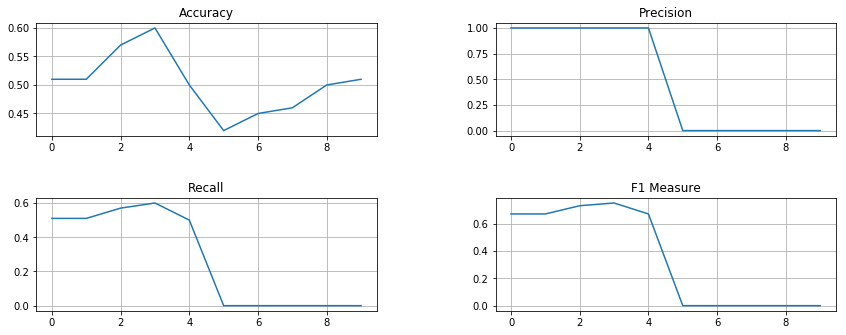

In [128]:
# Accuracy
plt.subplot(221)
plt.plot(logistic_reg_evaluation_df.index,logistic_reg_evaluation_df['Accuracy'])
plt.title('Accuracy')
plt.grid(True)

# Precision
plt.subplot(222)
plt.plot(logistic_reg_evaluation_df.index,logistic_reg_evaluation_df['Precision'])
plt.title('Precision')
plt.grid(True)

# Recall
plt.subplot(223)
plt.plot(logistic_reg_evaluation_df.index,logistic_reg_evaluation_df['Recall'])
plt.title('Recall')
plt.grid(True)

# F1 Measure
plt.subplot(224)
plt.plot(logistic_reg_evaluation_df.index,logistic_reg_evaluation_df['F1 Measure'])
plt.title('F1 Measure')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=1.95, hspace=0.55,
                    wspace=0.35)
plt.show()

In [101]:
linearsvc_evaluation_df = pd.DataFrame(
    kfold_lin_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
linearsvc_evaluation_df

,Model Name,Accuracy,Precision,Recall,F1 Measure
0,LinearSVC,0.01,1.0,0.01,0.02
1,LinearSVC,0.99,1.0,0.99,0.99
2,LinearSVC,0.46,1.0,0.46,0.63
3,LinearSVC,0.00,1.0,0.00,0.01
4,LinearSVC,0.99,1.0,0.99,0.99
5,LinearSVC,0.62,0.0,0.00,0.00
6,LinearSVC,0.18,0.0,0.00,0.00
7,LinearSVC,0.00,0.0,0.00,0.00
8,LinearSVC,0.49,0.0,0.00,0.00
9,LinearSVC,1.00,0.0,0.00,0.00


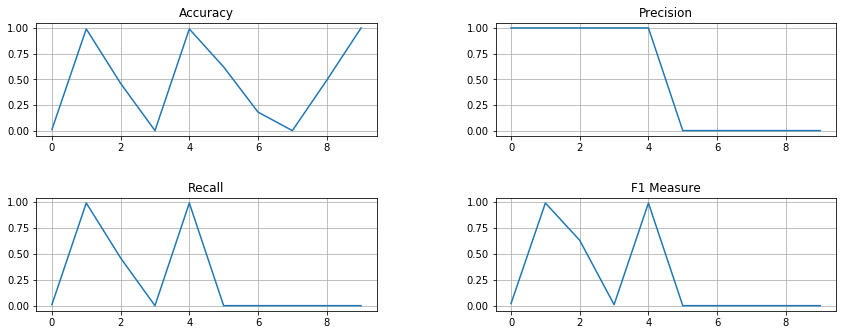

In [129]:
# Accuracy
plt.subplot(221)
plt.plot(linearsvc_evaluation_df.index,linearsvc_evaluation_df['Accuracy'])
plt.title('Accuracy')
plt.grid(True)

# Precision
plt.subplot(222)
plt.plot(linearsvc_evaluation_df.index,linearsvc_evaluation_df['Precision'])
plt.title('Precision')
plt.grid(True)

# Recall
plt.subplot(223)
plt.plot(linearsvc_evaluation_df.index,linearsvc_evaluation_df['Recall'])
plt.title('Recall')
plt.grid(True)

# F1 Measure
plt.subplot(224)
plt.plot(linearsvc_evaluation_df.index,linearsvc_evaluation_df['F1 Measure'])
plt.title('F1 Measure')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=1.95, hspace=0.55,
                    wspace=0.35)
plt.show()

In [142]:
random_forest_evaluation_df = pd.DataFrame(
    kfold_random_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
random_forest_evaluation_df

,Model Name,Accuracy,Precision,Recall,F1 Measure
0,Random Forest Classifier,0.49,1.0,0.49,0.66
1,Random Forest Classifier,0.52,1.0,0.52,0.68
2,Random Forest Classifier,0.59,1.0,0.59,0.74
3,Random Forest Classifier,0.61,1.0,0.61,0.75
4,Random Forest Classifier,0.59,1.0,0.59,0.74
5,Random Forest Classifier,0.70,0.0,0.00,0.00
6,Random Forest Classifier,0.73,0.0,0.00,0.00
7,Random Forest Classifier,0.73,0.0,0.00,0.00
8,Random Forest Classifier,0.72,0.0,0.00,0.00
9,Random Forest Classifier,0.72,0.0,0.00,0.00


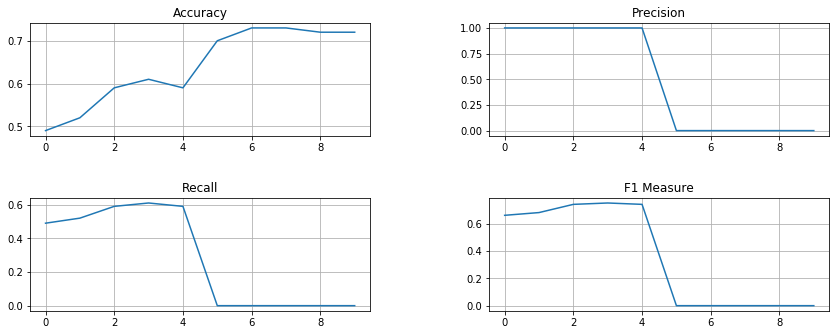

In [143]:
# Accuracy
plt.subplot(221)
plt.plot(random_forest_evaluation_df.index,random_forest_evaluation_df['Accuracy'])
plt.title('Accuracy')
plt.grid(True)

# Precision
plt.subplot(222)
plt.plot(random_forest_evaluation_df.index,random_forest_evaluation_df['Precision'])
plt.title('Precision')
plt.grid(True)

# Recall
plt.subplot(223)
plt.plot(random_forest_evaluation_df.index,random_forest_evaluation_df['Recall'])
plt.title('Recall')
plt.grid(True)

# F1 Measure
plt.subplot(224)
plt.plot(random_forest_evaluation_df.index,random_forest_evaluation_df['F1 Measure'])
plt.title('F1 Measure')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=1.95, hspace=0.55,
                    wspace=0.35)
plt.show()

In [146]:
kFold_All_Evaluation_Final =[
    {'Model Name':"Logistic Regression",
     "Accuracy":round( 
         sum(
             (logistic_reg_evaluation_df["Accuracy"])
         )/ len(logistic_reg_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (logistic_reg_evaluation_df["Precision"])
         )/ len(logistic_reg_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (logistic_reg_evaluation_df["Recall"])
         )/ len(logistic_reg_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (logistic_reg_evaluation_df["F1 Measure"])
         )/ len(logistic_reg_evaluation_df["F1 Measure"])
     
      ,2)},
    {'Model Name':"LinearSVc",
     "Accuracy":round( 
         sum(
             (linearsvc_evaluation_df["Accuracy"])
         )/ len(linearsvc_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (linearsvc_evaluation_df["Precision"])
         )/ len(linearsvc_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (linearsvc_evaluation_df["Recall"])
         )/ len(linearsvc_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (linearsvc_evaluation_df["F1 Measure"])
         )/ len(linearsvc_evaluation_df["F1 Measure"])
     
      ,2)},
        {'Model Name':"Random Forest Classifier",
     "Accuracy":round( 
         sum(
             (random_forest_evaluation_df["Accuracy"])
         )/ len(random_forest_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (random_forest_evaluation_df["Precision"])
         )/ len(random_forest_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (random_forest_evaluation_df["Recall"])
         )/ len(random_forest_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (random_forest_evaluation_df["F1 Measure"])
         )/ len(random_forest_evaluation_df["F1 Measure"])
     
      ,2)}

]
kFold_All_Evaluation_Final

[{'Model Name': 'Logistic Regression',
  'Accuracy': 0.5,
  'Precision': 0.5,
  'Recall': 0.27,
  'F1 Measure': 0.35},
 {'Model Name': 'LinearSVc',
  'Accuracy': 0.47,
  'Precision': 0.5,
  'Recall': 0.25,
  'F1 Measure': 0.26},
 {'Model Name': 'Random Forest Classifier',
  'Accuracy': 0.64,
  'Precision': 0.5,
  'Recall': 0.28,
  'F1 Measure': 0.36}]

In [152]:
kFold_All_Evaluation_df = pd.DataFrame(kFold_All_Evaluation_Final,
                                       columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])

In [153]:
kFold_All_Evaluation_df

,Model Name,Accuracy,Precision,Recall,F1 Measure
0,Logistic Regression,0.50,0.5,0.27,0.35
1,LinearSVc,0.47,0.5,0.25,0.26
2,Random Forest Classifier,0.64,0.5,0.28,0.36


# Best Model Using K-Fold

## Random Forest Classifier

# Stratified k-fold

In [14]:
Skfold_log_Eval = []
Skfold_lin_Eval = []
Skfold_random_Eval = []

# learning started from here
Skf = StratifiedKFold(n_splits=10)
for train, test in Skf.split(data_df.drop('default payment next month', axis=1),data_df['default payment next month']):
    print("%s %s" % (train, test))
    train_df = data_df.iloc[train]
    test_df =  data_df.iloc[test]
    X_train = train_df.drop("default payment next month" , axis = 1)
    y_train = train_df['default payment next month']
    X_test = test_df.drop('default payment next month', axis = 1)
    y_test = test_df['default payment next month']
#     Logistic Regression
    logisticRegression = LogisticRegression()
    logisticRegression.fit(X_train,y_train)
    logReg_Predictions = logisticRegression.predict(X_test)
    Skfold_log_Eval.append(evaluation('Logistic Regression',y_test,logReg_Predictions))
    
#     Linear SVC
    linearsvc = LinearSVC()
    linearsvc.fit(X_train,y_train)
    linearsvc_Predictions = linearsvc.predict(X_test)
    Skfold_lin_Eval.append(evaluation('LinearSVC',y_test,linearsvc_Predictions))
    
#     Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train,y_train)
    random_forest_Predictions = random_forest.predict(X_test)
    Skfold_random_Eval.append(evaluation('Random Forest Classifier',y_test,random_forest_Predictions))
    
print('Done With K-Fold processing')

logistic_reg_evaluation_df = pd.DataFrame(
    Skfold_log_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
logistic_reg_evaluation_df

linearsvc_evaluation_df = pd.DataFrame(
    Skfold_lin_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
linearsvc_evaluation_df

random_forest_evaluation_df = pd.DataFrame(
    Skfold_random_Eval ,
    columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])
random_forest_evaluation_df

SkFold_All_Evaluation_Final =[
    {'Model Name':"Logistic Regression",
     "Accuracy":round( 
         sum(
             (logistic_reg_evaluation_df["Accuracy"])
         )/ len(logistic_reg_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (logistic_reg_evaluation_df["Precision"])
         )/ len(logistic_reg_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (logistic_reg_evaluation_df["Recall"])
         )/ len(logistic_reg_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (logistic_reg_evaluation_df["F1 Measure"])
         )/ len(logistic_reg_evaluation_df["F1 Measure"])
     
      ,2)},
    {'Model Name':"LinearSVc",
     "Accuracy":round( 
         sum(
             (linearsvc_evaluation_df["Accuracy"])
         )/ len(linearsvc_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (linearsvc_evaluation_df["Precision"])
         )/ len(linearsvc_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (linearsvc_evaluation_df["Recall"])
         )/ len(linearsvc_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (linearsvc_evaluation_df["F1 Measure"])
         )/ len(linearsvc_evaluation_df["F1 Measure"])
     
      ,2)},
        {'Model Name':"Random Forest Classifier",
     "Accuracy":round( 
         sum(
             (random_forest_evaluation_df["Accuracy"])
         )/ len(random_forest_evaluation_df["Accuracy"])
     
      ,2),
     "Precision":round( 
         sum(
             (random_forest_evaluation_df["Precision"])
         )/ len(random_forest_evaluation_df["Precision"])
     
      ,2),
     "Recall":round( 
         sum(
             (random_forest_evaluation_df["Recall"])
         )/ len(random_forest_evaluation_df["Recall"])
     
      ,2),
     "F1 Measure":round( 
         sum(
             (random_forest_evaluation_df["F1 Measure"])
         )/ len(random_forest_evaluation_df["F1 Measure"])
     
      ,2)}

]
SkFold_All_Evaluation_Final

SkFold_All_Evaluation_df = pd.DataFrame(SkFold_All_Evaluation_Final,
                                       columns=['Model Name','Accuracy','Precision','Recall','F1 Measure'])

SkFold_All_Evaluation_df

[  664   665   666 ... 13269 13270 13271] [   0    1    2 ... 7297 7298 7299]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5881024096385542
(0.5776892430278885, 0.6551204819277109, 0.6139731827805223, None)
(0.5897141867313356, 0.5881024096385543, 0.5862440570884049, None)
(0.5881024096385542, 0.5881024096385542, 0.5881024096385542, None)
(0.5897141867313356, 0.5881024096385542, 0.5862440570884048, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5015060240963856
(0.5007552870090635, 0.9984939759036144, 0.6670020120724347, None)
(0.6253776435045317, 0.5015060240963856, 0.3379920240002892, None)
(0.5015060240963856, 0.5015060240963856, 0.5015060240963856, None)
(0.6253776435045317, 0.5015060240963856, 0.3379920240002892, None)
Accuracy score :
0.6634036144578314
(0.7183098591549296, 0.5376506024096386, 0.6149870801033591, None)
(0.6744377213945527, 0.6634036144578314, 0.6579952122924821, None)
(0.6634036144578314, 0.6634036144578314, 0.6634036144578314, None)
(0.6744377213945527, 0.6634036144578314, 0.6579952122924823, None)
[    0     1     2 ... 13269 13270 13271] [ 664  665  666 ... 7961 7962 7963]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.5918674698795181
(0.577020202020202, 0.6882530120481928, 0.6277472527472527, None)
(0.5954130860847279, 0.5918674698795181, 0.588040293040293, None)
(0.5918674698795181, 0.5918674698795181, 0.5918674698795181, None)
(0.5954130860847279, 0.5918674698795181, 0.5880402930402931, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5075301204819277
(0.631578947368421, 0.03614457831325301, 0.06837606837606837, None)
(0.5677274581803345, 0.5075301204819277, 0.3668390065524149, None)
(0.5075301204819277, 0.5075301204819277, 0.5075301204819277, None)
(0.5677274581803345, 0.5075301204819277, 0.36683900655241497, None)
Accuracy score :
0.6618975903614458
(0.7087378640776699, 0.5496987951807228, 0.6191687871077183, None)
(0.6704820931704463, 0.6618975903614457, 0.6575871017461408, None)
(0.6618975903614458, 0.6618975903614458, 0.6618975903614458, None)
(0.6704820931704463, 0.6618975903614458, 0.6575871017461408, None)
[    0     1     2 ... 13269 13270 13271] [1328 1329 1330 ... 8625 8626 8627]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.625
(0.6097883597883598, 0.6942771084337349, 0.6492957746478872, None)
(0.6274466274466275, 0.625, 0.623191576644332, None)
(0.625, 0.625, 0.625, None)
(0.6274466274466274, 0.625, 0.623191576644332, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5015060240963856
(1.0, 0.0030120481927710845, 0.006006006006006006, None)
(0.7503770739064857, 0.5015060240963856, 0.3366713447115457, None)
(0.5015060240963856, 0.5015060240963856, 0.5015060240963856, None)
(0.7503770739064857, 0.5015060240963856, 0.3366713447115457, None)
Accuracy score :
0.6844879518072289
(0.7494908350305499, 0.5542168674698795, 0.6372294372294371, None)
(0.6979234342416788, 0.6844879518072289, 0.6790411010264441, None)
(0.6844879518072289, 0.6844879518072289, 0.6844879518072289, None)
(0.6979234342416788, 0.6844879518072289, 0.6790411010264441, None)
[    0     1     2 ... 13269 13270 13271] [1992 1993 1994 ... 9289 9290 9291]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6189759036144579
(0.6234375, 0.6009036144578314, 0.6119631901840491, None)
(0.6191315406976744, 0.6189759036144579, 0.6188514175772317, None)
(0.6189759036144579, 0.6189759036144579, 0.6189759036144579, None)
(0.6191315406976744, 0.6189759036144579, 0.6188514175772317, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5331325301204819
(0.5181518151815182, 0.9457831325301205, 0.6695095948827293, None)
(0.6039034937976557, 0.5331325301204819, 0.43731890000546725, None)
(0.5331325301204819, 0.5331325301204819, 0.5331325301204819, None)
(0.6039034937976557, 0.5331325301204819, 0.4373189000054672, None)
Accuracy score :
0.6641566265060241
(0.719758064516129, 0.5376506024096386, 0.6155172413793104, None)
(0.6753838399503722, 0.6641566265060241, 0.6586944495666606, None)
(0.6641566265060241, 0.6641566265060241, 0.6641566265060241, None)
(0.6753838399503722, 0.6641566265060241, 0.6586944495666606, None)
[    0     1     2 ... 13269 13270 13271] [2656 2657 2658 ... 9953 9954 9955]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6287650602409639
(0.6138482023968043, 0.6942771084337349, 0.6515901060070672, None)
(0.6310142225155598, 0.6287650602409638, 0.6271649160172322, None)
(0.6287650602409639, 0.6287650602409639, 0.6287650602409639, None)
(0.6310142225155598, 0.6287650602409639, 0.6271649160172323, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5060240963855421
(0.5030395136778115, 0.9969879518072289, 0.6686868686868686, None)
(0.6681864235055724, 0.5060240963855421, 0.3491363337517183, None)
(0.5060240963855421, 0.5060240963855421, 0.5060240963855421, None)
(0.6681864235055724, 0.5060240963855421, 0.34913633375171826, None)
Accuracy score :
0.677710843373494
(0.7177121771217713, 0.5858433734939759, 0.6451077943615258, None)
(0.6839197017924378, 0.677710843373494, 0.6749676902842112, None)
(0.677710843373494, 0.677710843373494, 0.677710843373494, None)
(0.6839197017924378, 0.677710843373494, 0.6749676902842112, None)
[    0     1     2 ... 13269 13270 13271] [ 3320  3321  3322 ... 10617 10618 10619]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6558734939759037
(0.6210526315789474, 0.7996987951807228, 0.6991441737985516, None)
(0.6699343496161122, 0.6558734939759037, 0.6486046286758809, None)
(0.6558734939759037, 0.6558734939759037, 0.6558734939759037, None)
(0.6699343496161122, 0.6558734939759037, 0.648604628675881, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.6167168674698795
(0.6352530541012217, 0.5481927710843374, 0.5885206143896524, None)
(0.618951030361869, 0.6167168674698795, 0.6149086510989841, None)
(0.6167168674698795, 0.6167168674698795, 0.6167168674698795, None)
(0.618951030361869, 0.6167168674698795, 0.614908651098984, None)
Accuracy score :
0.7274096385542169
(0.7374213836477987, 0.7063253012048193, 0.7215384615384615, None)
(0.727814738066674, 0.7274096385542168, 0.7272884048105287, None)
(0.7274096385542169, 0.7274096385542169, 0.727409638554217, None)
(0.727814738066674, 0.7274096385542169, 0.7272884048105288, None)
[    0     1     2 ... 13269 13270 13271] [ 3984  3985  3986 ... 11280 11281 11282]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6877828054298643
(0.6786226685796269, 0.7134238310708899, 0.6955882352941176, None)
(0.6882779479623096, 0.6877828054298643, 0.687577399380805, None)
(0.6877828054298643, 0.6877828054298643, 0.6877828054298643, None)
(0.6882779479623095, 0.6877828054298643, 0.687577399380805, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5475113122171946
(0.5344262295081967, 0.7375565610859729, 0.6197718631178707, None)
(0.55553428263731, 0.5475113122171946, 0.5305563226203879, None)
(0.5475113122171946, 0.5475113122171946, 0.5475113122171946, None)
(0.55553428263731, 0.5475113122171946, 0.5305563226203878, None)
Accuracy score :
0.7383107088989442
(0.7624584717607974, 0.6923076923076923, 0.7256916996047431, None)
(0.7403452579798462, 0.7383107088989442, 0.7377557272356808, None)
(0.7383107088989442, 0.7383107088989442, 0.7383107088989443, None)
(0.7403452579798463, 0.7383107088989442, 0.7377557272356808, None)
[    0     1     2 ... 13269 13270 13271] [ 4647  4648  4649 ... 11943 11944 11945]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6168929110105581
(0.6037483266398929, 0.6802413273001509, 0.6397163120567375, None)
(0.618799897344126, 0.6168929110105581, 0.615349299345599, None)
(0.6168929110105581, 0.6168929110105581, 0.6168929110105581, None)
(0.618799897344126, 0.6168929110105581, 0.615349299345599, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.6070889894419306
(0.6354961832061069, 0.502262443438914, 0.561078348778433, None)
(0.6120124307551731, 0.6070889894419307, 0.6027234747305135, None)
(0.6070889894419306, 0.6070889894419306, 0.6070889894419306, None)
(0.6120124307551731, 0.6070889894419306, 0.6027234747305134, None)
Accuracy score :
0.691553544494721
(0.7228070175438597, 0.6214177978883861, 0.6682887266828873, None)
(0.6953982177666389, 0.691553544494721, 0.6900287889933111, None)
(0.691553544494721, 0.691553544494721, 0.691553544494721, None)
(0.6953982177666389, 0.691553544494721, 0.6900287889933111, None)
[    0     1     2 ... 13269 13270 13271] [ 5310  5311  5312 ... 12606 12607 12608]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6191553544494721
(0.6058981233243967, 0.6817496229260935, 0.6415897799858055, None)
(0.6210525099380604, 0.6191553544494721, 0.6176573195986952, None)
(0.6191553544494721, 0.6191553544494721, 0.6191553544494721, None)
(0.6210525099380605, 0.6191553544494721, 0.6176573195986953, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.5776772247360482
(0.5560391730141458, 0.770739064856712, 0.6460176991150444, None)
(0.5912873997748862, 0.5776772247360483, 0.5613266065668681, None)
(0.5776772247360482, 0.5776772247360482, 0.5776772247360482, None)
(0.5912873997748862, 0.5776772247360482, 0.5613266065668681, None)
Accuracy score :
0.7043740573152338
(0.724709784411277, 0.6591251885369532, 0.6903633491311216, None)
(0.7060616695223743, 0.7043740573152337, 0.7037675331514194, None)
(0.7043740573152338, 0.7043740573152338, 0.7043740573152338, None)
(0.7060616695223744, 0.7043740573152338, 0.7037675331514194, None)
[    0     1     2 ... 12606 12607 12608] [ 5973  5974  5975 ... 13269 13270 13271]


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score :
0.6199095022624435
(0.5997490589711418, 0.7209653092006033, 0.6547945205479452, None)
(0.6250163064231891, 0.6199095022624435, 0.6159878643008183, None)
(0.6199095022624435, 0.6199095022624435, 0.6199095022624435, None)
(0.6250163064231891, 0.6199095022624435, 0.6159878643008183, None)


c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\khalil\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score :
0.552790346907994
(0.538546255506608, 0.7375565610859729, 0.622533418204965, None)
(0.561139156461438, 0.552790346907994, 0.5369836378721402, None)
(0.552790346907994, 0.552790346907994, 0.552790346907994, None)
(0.561139156461438, 0.552790346907994, 0.5369836378721402, None)
Accuracy score :
0.7043740573152338
(0.7308347529812607, 0.6470588235294118, 0.6864000000000001, None)
(0.7070953196570715, 0.7043740573152337, 0.7033997146932953, None)
(0.7043740573152338, 0.7043740573152338, 0.7043740573152338, None)
(0.7070953196570714, 0.7043740573152338, 0.7033997146932953, None)
Done With K-Fold processing


,Model Name,Accuracy,Precision,Recall,F1 Measure
0,Logistic Regression,0.63,0.61,0.69,0.65
1,LinearSVc,0.55,0.61,0.63,0.51
2,Random Forest Classifier,0.69,0.73,0.61,0.66


# Best Model
## Random Forest

In [155]:
X = data_df.drop('default payment next month',axis=1)
y = data_df['default payment next month']
random_forest = RandomForestClassifier()
random_forest.fit(X,y)
print('Best Model is Learned')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Model is Learned


In [156]:
print('Saving best model')
fileName = 'BestModel.sav'
pickle.dump(random_forest,open(fileName,'wb'))

Saving best model


# Loading best model

In [16]:
fileName = 'BestModel.sav'
print('Loading best model')
bestModel = pickle.load(open(fileName,'rb'))
print('Best model is loaded')

Loading best model
Best model is loaded


# Making Application

In [18]:
from tkinter import *
import random

root = Tk()
root.title('Credit Card Prediction')
#You can set the geometry attribute to change the root windows size
root.geometry("500x180") #You want the size of the app to be 500x500
root.resizable(0, 0) #Don't allow resizing in the x or y direction

# label
label_text = "Next Month Credit Card Defauter Prediction"
w = Label(root, text= label_text,font=("Helvetica", 16))
w.pack()
w = Label(root, justify=CENTER)
w.pack()
def verification():
    rand_unseen = pd.DataFrame(
    [{"LIMIT_BAL":random.randint(20000, 180000),
    "SEX":random.randint(1,2),
    "EDUCATION":random.randint(1,3),
    "MARRIAGE":random.randint(1,2),
    "AGE":random.randint(24,58),
    "PAY_0":random.randint(-2,2),
    "PAY_2":random.randint(-2,2),
    "PAY_3":random.randint(-2,2),
    "PAY_4":random.randint(-2,2),
    "PAY_5":random.randint(-2,2),
    "PAY_6":random.randint(-2,2),
    "BILL_AMT1":random.randint(0,152519),
    "BILL_AMT2":random.randint(0,152519),
    "BILL_AMT3":random.randint(0,152519),
    "BILL_AMT4":random.randint(0,152519),
    "BILL_AMT5":random.randint(0,152519),
    "BILL_AMT6":random.randint(0,152519),
    "PAY_AMT1":random.randint(0,152519),
    "PAY_AMT2":random.randint(0,152519),
    "PAY_AMT3":random.randint(0,152519),
    "PAY_AMT4":random.randint(0,152519),
    "PAY_AMT5":random.randint(0,152519),
    "PAY_AMT6":random.randint(0,152519),
     }
    ])
    prediction = bestModel.predict(rand_unseen)
    if(prediction[0] == 1):
        w.config(text='This card will be defaulter')
#         print("fake")
    else:
        w.config(text='This card will not be defaulter')
#         print("Will not default")
    
#     print("Start Button Work")
    
button_start = Button(root,
                      text="Verify Unseen Example",
                      height = 5,
                      width=35,
                      command=verification)
button_start.pack(padx=10)

root.mainloop()